In [22]:
!pip install investpy
!pip install matplotlib
import investpy

search_results = investpy.search_quotes(text='yar',
                                        products=['stocks'],
                                        countries=['norway'],                                        
                                        n_results=10)
a=search_results[0].retrieve_historical_data(from_date='01/01/2020', to_date='25/05/2021')


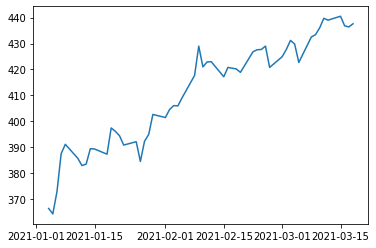

In [2]:
import matplotlib.pyplot as plt
plt.plot(a['High'])
plt.show()

In [23]:
import pandas as pd
import numpy as np

p=[('Klp Aksjeglobal Mer Samfunnsansvar', 176+125,1,'funds','norway'),
    ('Microsoft Corporation',97,8.5,'stocks','united states'),
    ('odin norge c',12,1,'funds','norway'),
    ('odin norden c',9.43,8.5,'funds','norway'),
    ('yar',30,1,'stocks','norway'),
    ('eqnr',50,1,'stocks','norway'),
    ('Schlumberger NV',353,8.5,'stocks','united states')
]

raw_values = []
for i,t in enumerate(p):
    search_results = investpy.search_quotes(text=t[0],
                                        products=[t[3]],
                                        countries=[t[4]],                                        
                                        n_results=10)
    a=search_results[0].retrieve_historical_data(from_date='03/03/2020', to_date='26/05/2021')    
    raw_values.append(a)
  
        


In [28]:
# Get unique dates
import pandas as pd
sm = None
highs = None
cm = pd.DataFrame()

a = raw_values[0]
u = raw_values[0].index
for a in raw_values[1:]:  
    u.append(a.index)
u = u.unique()
cm = pd.DataFrame(u)
col_names = ['Date']
for a,t in zip(raw_values, p):  
  ser = a['High']*t[2]*t[1]      
  cm=cm.merge(ser, on='Date')
  col_names.append(t[0])
cm.columns =  col_names # ['a','b','c','d','e','f','g','h']#



DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-16',
               ...
               '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-24', '2021-05-25'],
              dtype='datetime64[ns]', name='Date', length=312, freq=None)


DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-16',
               ...
               '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-24', '2021-05-25'],
              dtype='datetime64[ns]', name='Date', length=312, freq=None)


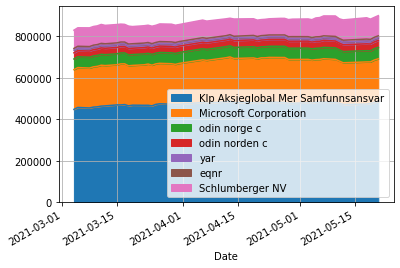

In [32]:
start_date =  pd.to_datetime('2021-03-03')
end_date =  pd.to_datetime('2021-05-26')
mask =  (cm['Date'] > start_date) & (cm['Date'] <= end_date)
cm_sub = cm.loc[mask]
print(a.index)

sb = cm_sub
sb.set_index(['Date'],inplace=True)
sb.plot.area()
plt.grid()
plt.show()

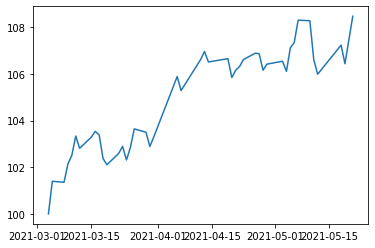

In [33]:
sm = cm_sub.sum(axis=1)
sm = 100*sm/sm[0]
plt.plot(sm)
plt.show()